In [1]:
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_frame = read_csv('iris.csv')

In [3]:
#Data points
data_points = data_frame.shape[0]
print("Number of data points: ",data_points)

# Data types of the columns
print("Data types of columns: ",data_frame.dtypes)

#Column names?
print("Column names:", data_frame.columns)

# 4. How many species of flowers are included in the data?
count_species = data_frame['variety'].unique()
print(f"Species and Number of flower species:", count_species,',', len(count_species))


Number of data points:  150
Data types of columns:  sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object
Column names: Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
Species and Number of flower species: ['Setosa' 'Versicolor' 'Virginica'] , 3


In [4]:
# 1-based indexing
data_frame.iloc[36] = [4.9, 3.1, 1.5, 0.2, "Setosa"]  # Correct the 35th row
data_frame.iloc[39] = [4.9, 3.6, 1.4, 0.1, "Setosa"]  # Correct the 38th row

# Display the corrected rows
print("\nRows after correcting:")
print(data_frame.iloc[[36, 39]])



Rows after correcting:
    sepal.length  sepal.width  petal.length  petal.width variety
36           4.9          3.1           1.5          0.2  Setosa
39           4.9          3.6           1.4          0.1  Setosa


In [5]:
# Adding the new features
data_frame['petal.ratio'] = data_frame['petal.length'] / data_frame['petal.width']
data_frame['sepal.ratio'] = data_frame['sepal.length'] / data_frame['sepal.width']

# Save DataFrame as iris_corrected.csv
data_frame.to_csv('iris_corrected.csv', index=False)
#new csv read
new_data_frame = read_csv('iris_corrected.csv')
print(new_data_frame.head())

   sepal.length  sepal.width  petal.length  petal.width variety  petal.ratio  \
0           5.1          3.5           1.4          0.2  Setosa          7.0   
1           4.9          3.0           1.4          0.2  Setosa          7.0   
2           4.7          3.2           1.3          0.2  Setosa          6.5   
3           4.6          3.1           1.5          0.2  Setosa          7.5   
4           5.0          3.6           1.4          0.2  Setosa          7.0   

   sepal.ratio  
0     1.457143  
1     1.633333  
2     1.468750  
3     1.483871  
4     1.388889  


In [6]:
# Correlation
correlation_matrix = new_data_frame.select_dtypes(include=['float64', 'int64']).corr()

# Display the correlation matrix
print("\nPairwise correlation matrix:")
print(correlation_matrix)

# Identify highest positive and negative correlations
positive_corr = correlation_matrix.unstack().sort_values(ascending=False)
negative_corr = correlation_matrix.unstack().sort_values(ascending=True)

# Display
print("\nHighest positive correlation:")
print(positive_corr[positive_corr != 1].head(1))

print("\nHighest negative correlation:")
print(negative_corr.head(1))



Pairwise correlation matrix:
              sepal.length  sepal.width  petal.length  petal.width  \
sepal.length      1.000000    -0.119686      0.875900     0.822005   
sepal.width      -0.119686     1.000000     -0.424551    -0.362859   
petal.length      0.875900    -0.424551      1.000000     0.962878   
petal.width       0.822005    -0.362859      0.962878     1.000000   
petal.ratio      -0.572986     0.370929     -0.694816    -0.743010   
sepal.ratio       0.732777    -0.746705      0.838365     0.754821   

              petal.ratio  sepal.ratio  
sepal.length    -0.572986     0.732777  
sepal.width      0.370929    -0.746705  
petal.length    -0.694816     0.838365  
petal.width     -0.743010     0.754821  
petal.ratio      1.000000    -0.612629  
sepal.ratio     -0.612629     1.000000  

Highest positive correlation:
petal.length  petal.width    0.962878
dtype: float64

Highest negative correlation:
sepal.width  sepal.ratio   -0.746705
dtype: float64


Species and Number of flower species: ['Setosa' 'Versicolor' 'Virginica'] , 3


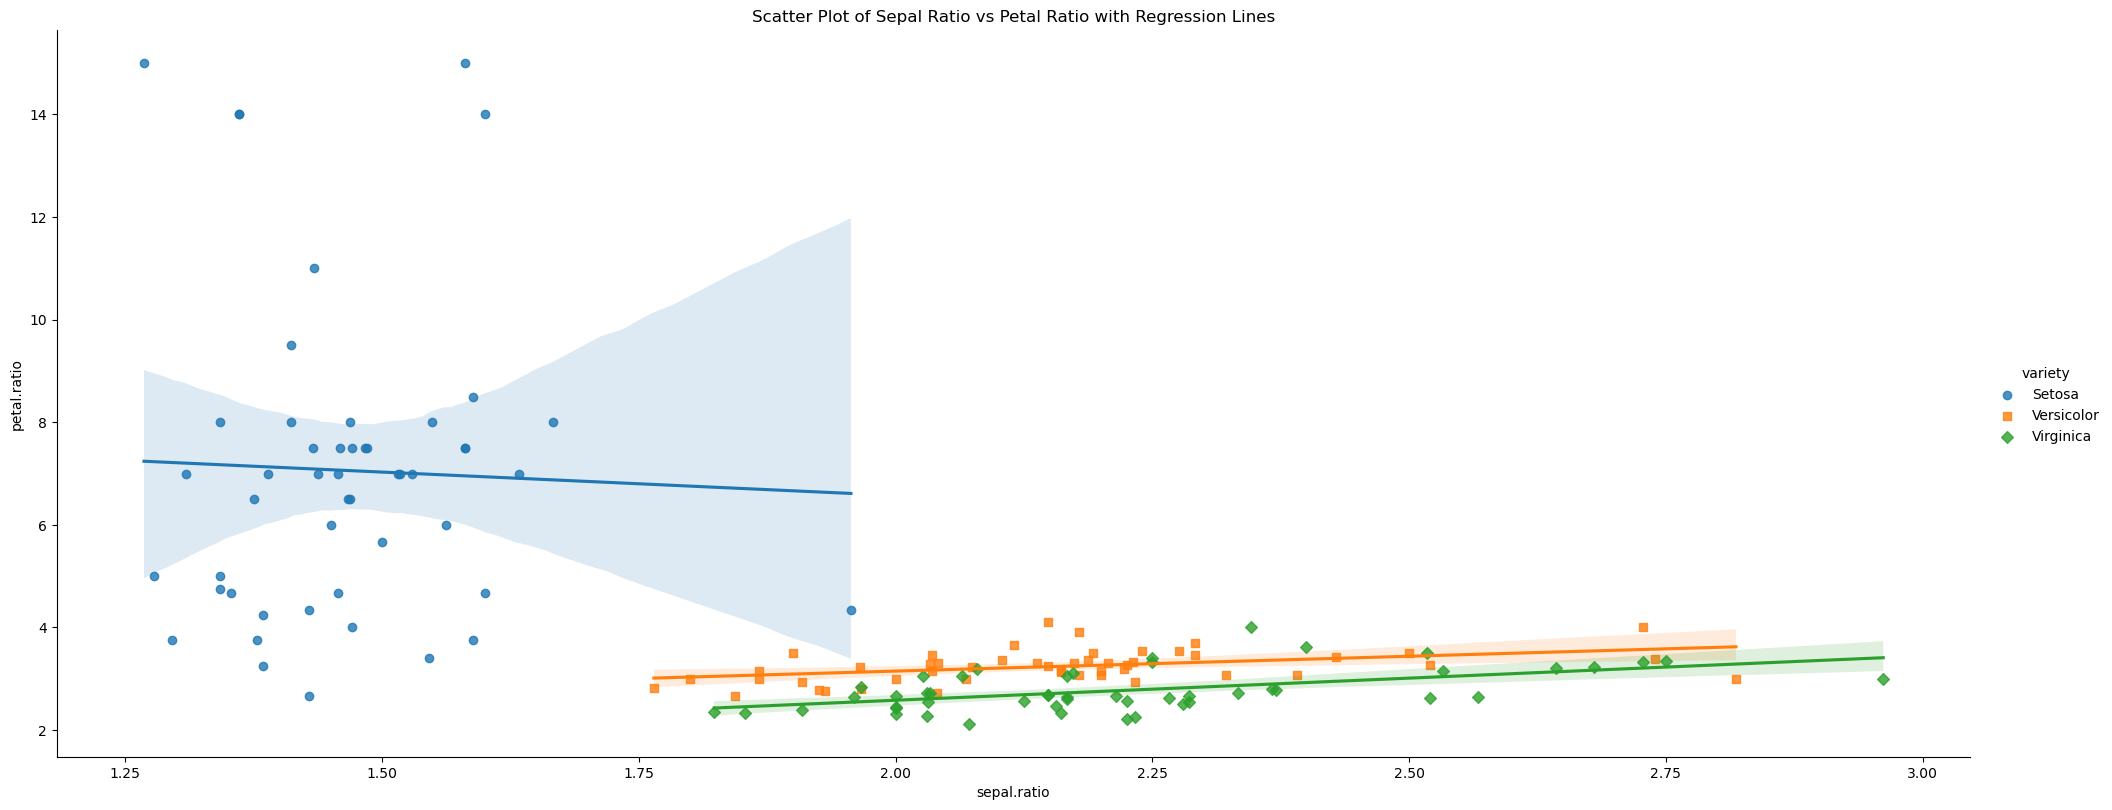

In [7]:
count_species = new_data_frame['variety'].unique()
print(f"Species and Number of flower species:", count_species,',', len(count_species))
# Create the scatter plot with regression lines for each species
sns.lmplot(
    data=new_data_frame, x='sepal.ratio', y='petal.ratio', hue='variety', 
    markers=['o', 's', 'D'], height=8, aspect=2.5
)

# Add title and labels
plt.title("Scatter Plot of Sepal Ratio vs Petal Ratio with Regression Lines")

# Save the plot as a PDF
plt.savefig("iris_scatter_with_regression.pdf")

# Display the plot
plt.show()


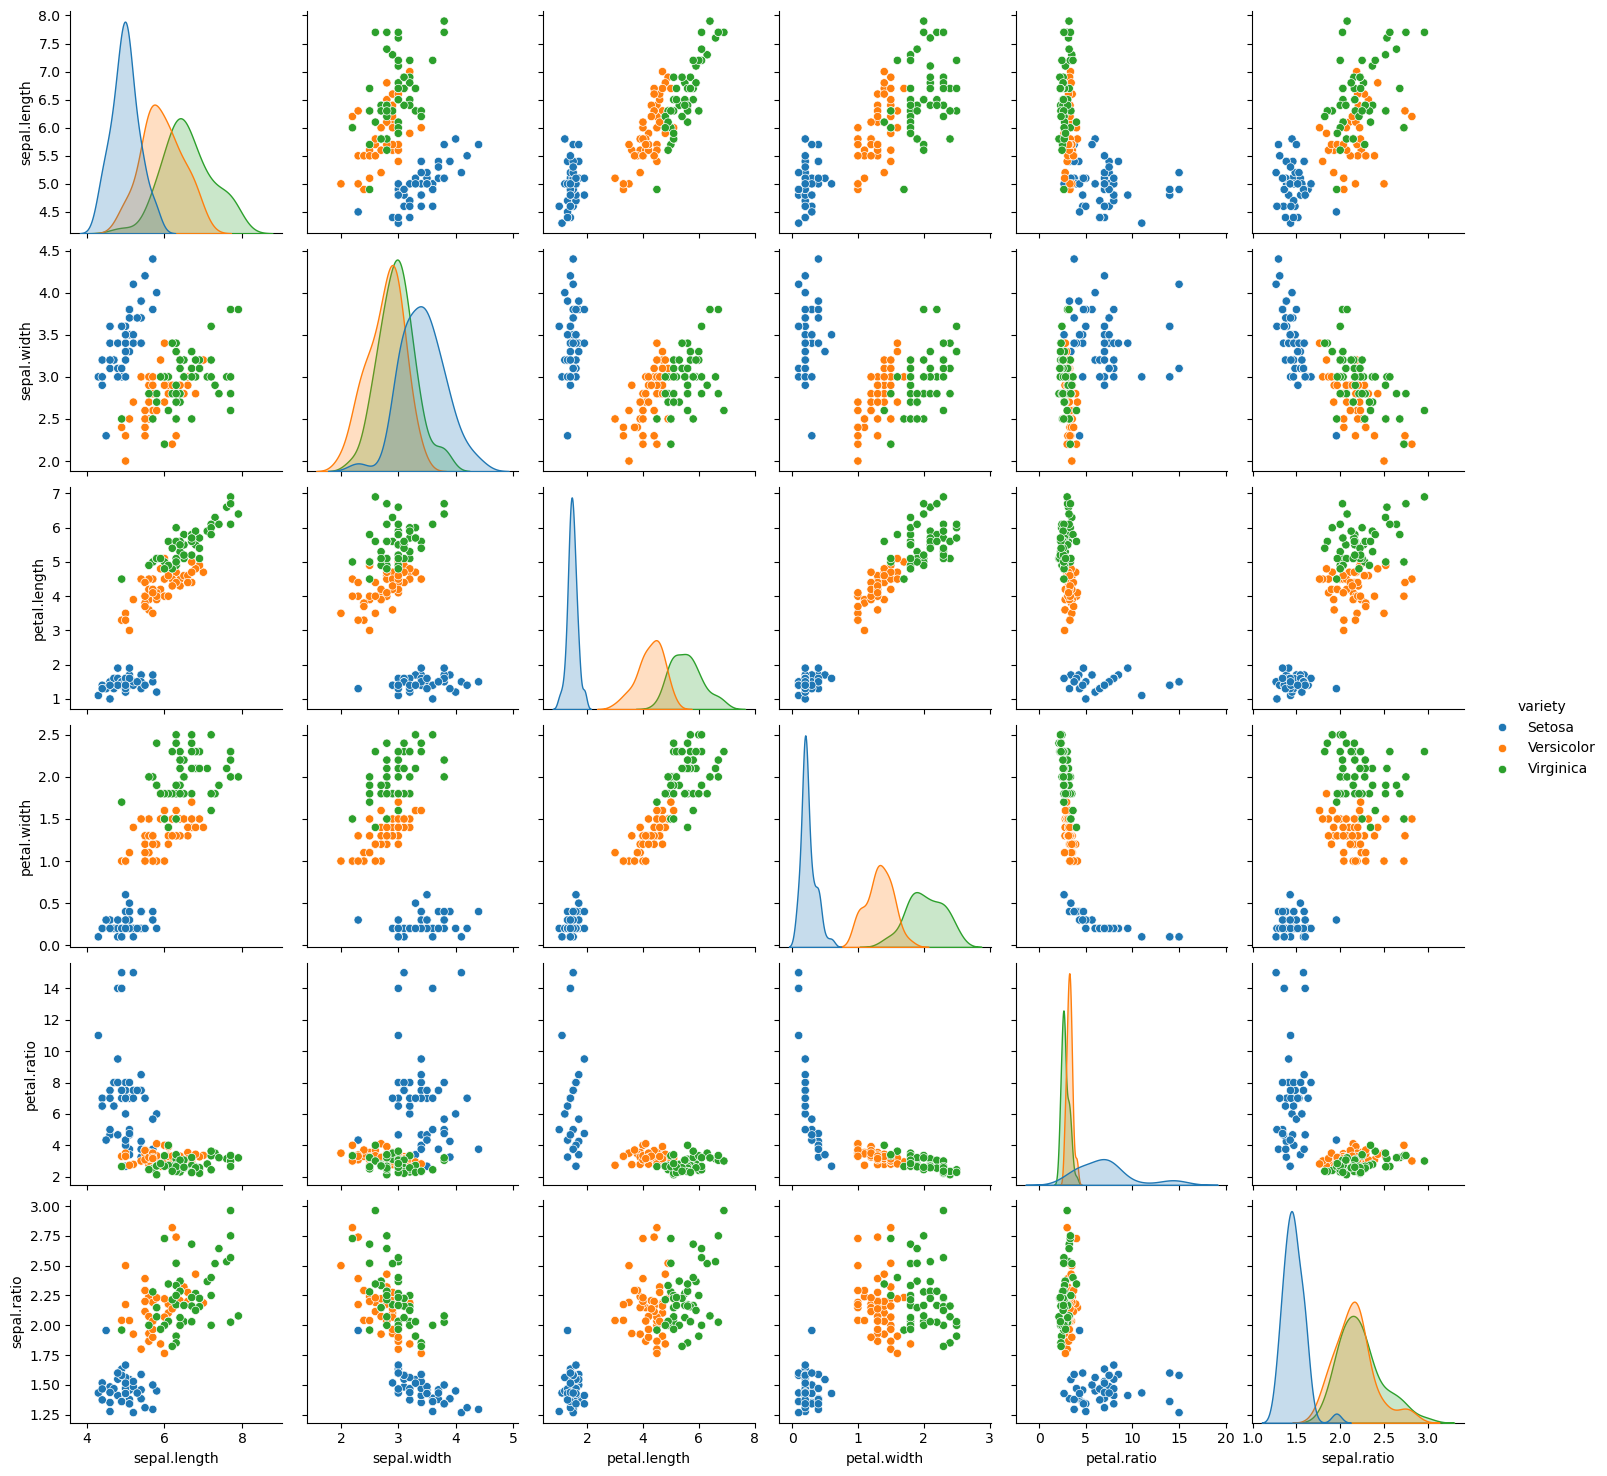

In [8]:
# Create a pair plot (
from seaborn import pairplot

pairplot(new_data_frame, hue="variety")